<a href="https://colab.research.google.com/github/Jakelinecs/Tareas-Machine-Learning/blob/main/N16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np

class ScratchLinearRegression():


    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None

    def _linear_hypothesis(self, X):

        return X @ self.coef_

    def _gradient_descent(self, X, error):
        m = len(X)

        gradient = (1 / m) * (X.T @ error)

        self.coef_ -= self.lr * gradient

    def _loss_function(self, y_pred, y):

        m = len(y)
        error = y_pred - y
        return (1 / (2 * m)) * np.sum(error**2)

    def fit(self, X, y, X_val=None, y_val=None):


        if not self.no_bias:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
            if X_val is not None:
                X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])

        n_features_with_bias = X.shape[1]

        self.coef_ = np.random.rand(n_features_with_bias)

        for i in range(self.iter):
            y_pred = self._linear_hypothesis(X)

            error = y_pred - y

            self.loss[i] = self._loss_function(y_pred, y)

            if X_val is not None and y_val is not None:
                y_val_pred = self._linear_hypothesis(X_val)
                self.val_loss[i] = self._loss_function(y_val_pred, y_val)

            self._gradient_descent(X, error)

            if self.verbose and (i % 100 == 0):
                print(f"Iteration {i}: Train Loss = {self.loss[i]:.4f}")

        if self.verbose:
            print(f"Final Train Loss: {self.loss[-1]:.4f}")
            if X_val is not None:
                 print(f"Final Val Loss: {self.val_loss[-1]:.4f}")

    def predict(self, X):

        if not self.no_bias and X.shape[1] != len(self.coef_):
            X = np.hstack([np.ones((X.shape[0], 1)), X])

        return self._linear_hypothesis(X)

In [26]:
def MSE(y_pred, y):

    m = len(y)
    mse = (1 / m) * np.sum((y_pred - y)**2)
    return mse

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

try:
    df = pd.read_csv('train.csv')

    cols_to_drop = df.columns[df.isnull().sum() >= 5]
    df_cleaned = df.drop(columns=cols_to_drop).dropna().copy()

    df_cleaned['SalePrice_log'] = np.log(df_cleaned['SalePrice'])

    X_cols = ['GrLivArea', 'YearBuilt']
    X = df_cleaned[X_cols].values
    y = df_cleaned['SalePrice_log'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("データ準備完了。")

except FileNotFoundError:
    print("❌ 'train.csv'")
    X_train_scaled, X_test_scaled, y_train, y_test = None, None, None, None

データ準備完了。


In [29]:
if X_train_scaled is not None:
    slr = ScratchLinearRegression(num_iter=10000, lr=0.01, no_bias=False, verbose=True)

    slr.fit(X_train_scaled, y_train)

    y_pred_slr = slr.predict(X_test_scaled)

    mse_slr = MSE(y_pred_slr, y_test)
    print("\n--- スクラッチ実装による評価 ---")
    print(f"MSE (Scratch): {mse_slr:.4f}")

    from sklearn.linear_model import LinearRegression
    sk_lr = LinearRegression()
    sk_lr.fit(X_train_scaled, y_train)
    y_pred_sk = sk_lr.predict(X_test_scaled)
    mse_sk = MSE(y_pred_sk, y_test)

    print("\n--- scikit-learn実装との比較 ---")
    print(f"MSE (scikit-learn): {mse_sk:.4f}")
    print(f"Scratch 実装の $\\theta$ (重み): {slr.coef_}")
    print(f"scikit-learn の $\\theta$ (重み): {np.hstack([sk_lr.intercept_, sk_lr.coef_])}")

Iteration 0: Train Loss = 72.2591
Iteration 100: Train Loss = 9.6958
Iteration 200: Train Loss = 1.3198
Iteration 300: Train Loss = 0.1978
Iteration 400: Train Loss = 0.0474
Iteration 500: Train Loss = 0.0272
Iteration 600: Train Loss = 0.0245
Iteration 700: Train Loss = 0.0242
Iteration 800: Train Loss = 0.0241
Iteration 900: Train Loss = 0.0241
Iteration 1000: Train Loss = 0.0241
Iteration 1100: Train Loss = 0.0241
Iteration 1200: Train Loss = 0.0241
Iteration 1300: Train Loss = 0.0241
Iteration 1400: Train Loss = 0.0241
Iteration 1500: Train Loss = 0.0241
Iteration 1600: Train Loss = 0.0241
Iteration 1700: Train Loss = 0.0241
Iteration 1800: Train Loss = 0.0241
Iteration 1900: Train Loss = 0.0241
Iteration 2000: Train Loss = 0.0241
Iteration 2100: Train Loss = 0.0241
Iteration 2200: Train Loss = 0.0241
Iteration 2300: Train Loss = 0.0241
Iteration 2400: Train Loss = 0.0241
Iteration 2500: Train Loss = 0.0241
Iteration 2600: Train Loss = 0.0241
Iteration 2700: Train Loss = 0.0241
Ite


--- Curva de Aprendizaje (Problema 7) ---


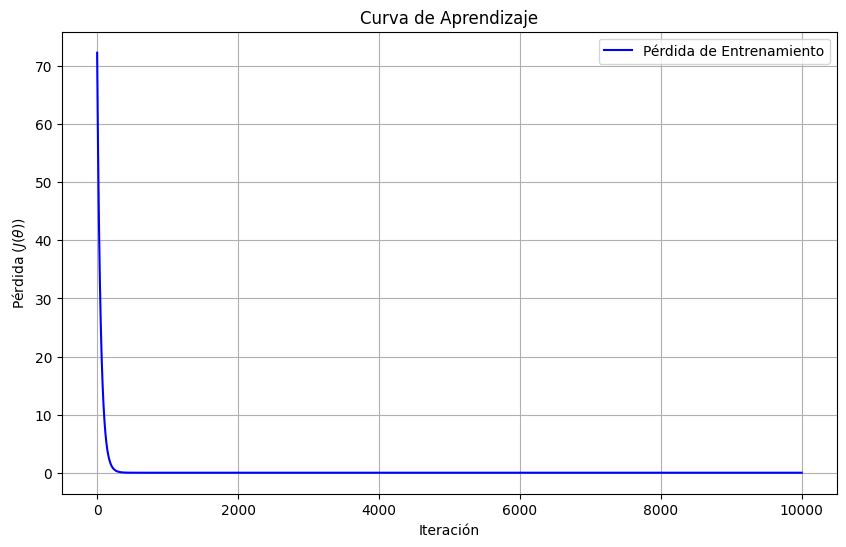

In [36]:
import matplotlib.pyplot as plt # <--- ¡Esta línea es la solución!
import numpy as np
# import pandas as pd
# ... otras librerías

# [Definición de la función de la curva de aprendizaje]
def plot_learning_curve(loss, val_loss=None, title='Curva de Aprendizaje'):
    plt.figure(figsize=(10, 6))
    plt.plot(loss, label='Pérdida de Entrenamiento', color='blue')

    if val_loss is not None and np.sum(val_loss) != 0:
        plt.plot(val_loss, label='Pérdida de Validación', color='red')

    plt.title(title)
    plt.xlabel('Iteración')
    plt.ylabel('Pérdida ($J(\\theta)$)')
    plt.legend()
    plt.grid(True)
    plt.show()

# [Llamada a la función]
if X_train_scaled is not None:
    print("\n--- Curva de Aprendizaje (Problema 7) ---")
    # Asumiendo que slr y X_train_scaled están definidos
    plot_learning_curve(slr.loss, slr.val_loss)

In [33]:
if X_train_scaled is not None:
    # 1. Entrenamiento sin Sesgo (no_bias=True)
    slr_no_bias = ScratchLinearRegression(num_iter=10000, lr=0.01, no_bias=True, verbose=False)
    slr_no_bias.fit(X_train_scaled, y_train)
    y_pred_no_bias = slr_no_bias.predict(X_test_scaled)
    mse_no_bias = MSE(y_pred_no_bias, y_test)

    print("\n--- Comparación del Término de Sesgo (Problema 8) ---")
    print(f"MSE (Modelo Estándar con Sesgo): {mse_slr:.4f}")
    print(f"MSE (Modelo SIN Sesgo): {mse_no_bias:.4f}")


--- Comparación del Término de Sesgo (Problema 8) ---
MSE (Modelo Estándar con Sesgo): 0.0474
MSE (Modelo SIN Sesgo): 144.7071


In [34]:
if X_train_scaled is not None:
    # Aumentar la dimensionalidad: Añadir GrLivArea^2
    X_train_multi = np.hstack([X_train_scaled, (X_train_scaled[:, 0]**2).reshape(-1, 1)])
    X_test_multi = np.hstack([X_test_scaled, (X_test_scaled[:, 0]**2).reshape(-1, 1)])

    # 2. Entrenamiento con la feature cuadrática
    slr_multi = ScratchLinearRegression(num_iter=10000, lr=0.01, no_bias=False, verbose=False)
    slr_multi.fit(X_train_multi, y_train)
    y_pred_multi = slr_multi.predict(X_test_multi)
    mse_multi = MSE(y_pred_multi, y_test)

    print("\n--- Comparación de Dimensionalidad (Problema 9) ---")
    print(f"MSE (Lineal, 2 features): {mse_slr:.4f}")
    print(f"MSE (Polinomial, 3 features): {mse_multi:.4f}")


--- Comparación de Dimensionalidad (Problema 9) ---
MSE (Lineal, 2 features): 0.0474
MSE (Polinomial, 3 features): 0.0470
